In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data_set = pd.read_csv("heart_disease_data.csv")

In [3]:
#we will now try to print the first few rows of this data set
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#overview of the data set on number of rows and coloumns present
# Check the shape of data set
print(data_set.shape)

# Check the structure of the dataset
print(data_set.info())

# Summary statistics
print(data_set.describe())

# Check for missing values
print(data_set.isnull().sum())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997 

In [5]:
data_set['target'].value_counts() 
#this will give us an idea of distribution of number of zeros and ones

1    165
0    138
Name: target, dtype: int64

In [6]:
#now we shall split the features and the target.
x = data_set.drop(columns='target',axis=1)
y = data_set['target']
#whenever we drop any coloumn the axis value =1
#whenever we drop a row the axis value will be = 0

In [7]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Display the sizes of the splits
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (242, 13)
Testing set size: (61, 13)


In [8]:
model=LogisticRegression()

#now comes the training part-
model.fit(X_train,Y_train) #this is where the model starts finding patterns or relationships

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#now we will evaluate how well our model works.
#accuracy score is chosen here-
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.8429752066115702


In [10]:
#now we will try to find accuracy score for test data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

print("Accuracy on testing data:", testing_data_accuracy)

Accuracy on testing data: 0.8032786885245902


In [21]:
# Function to take user input and predict
def predict_heart_disease(model):
    print("Enter the following details for prediction:")
    
    # Take inputs from the user
    age = int(input("Age: "))
    sex = int(input("Sex (1=Male, 0=Female): "))
    cp = int(input("Chest Pain Type (0-3): "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Cholesterol Level: "))
    fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1=Yes, 0=No): "))
    restecg = int(input("Resting ECG (0-2): "))
    thalach = int(input("Max Heart Rate Achieved: "))
    exang = int(input("Exercise-Induced Angina (1=Yes, 0=No): "))
    oldpeak = float(input("ST Depression: "))
    slope = int(input("Slope of Peak Exercise ST Segment (0-2): "))
    ca = int(input("Number of Major Vessels (0-4): "))
    thal = int(input("Thalassemia Type (0-3): "))

    # Feature names EXACTLY as they were in training
    feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                     "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

    # Convert input into a Pandas DataFrame
    input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]], 
                              columns=feature_names)

    # Make prediction
    prediction = model.predict(input_data)

    # Display result
    if prediction[0] == 1:
        print("💔 High risk of heart disease. Please consult a doctor!")
    else:
        print("💖 Low risk of heart disease. Stay healthy!")

# Call function after training the model
predict_heart_disease(model)


Enter the following details for prediction:
Age: 37
Sex (1=Male, 0=Female): 1
Chest Pain Type (0-3): 2
Resting Blood Pressure: 130
Cholesterol Level: 250
Fasting Blood Sugar > 120 mg/dl (1=Yes, 0=No): 0
Resting ECG (0-2): 1
Max Heart Rate Achieved: 187
Exercise-Induced Angina (1=Yes, 0=No): 0
ST Depression: 3.5
Slope of Peak Exercise ST Segment (0-2): 0
Number of Major Vessels (0-4): 0
Thalassemia Type (0-3): 2
💔 High risk of heart disease. Please consult a doctor!


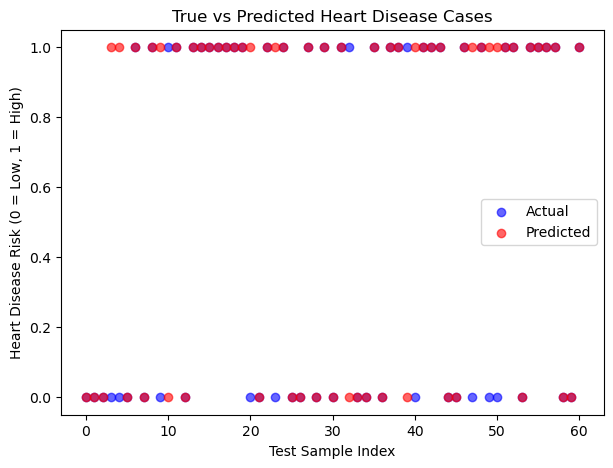

In [13]:
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)

# Convert to binary if necessary
y_pred = np.round(y_pred)  # Ensure it's 0 or 1

# Scatter plot for true vs predicted values
plt.figure(figsize=(7,5))
plt.scatter(range(len(Y_test)), Y_test, label="Actual", color="blue", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="red", alpha=0.6)
plt.xlabel("Test Sample Index")
plt.ylabel("Heart Disease Risk (0 = Low, 1 = High)")
plt.legend()
plt.title("True vs Predicted Heart Disease Cases")
plt.show()


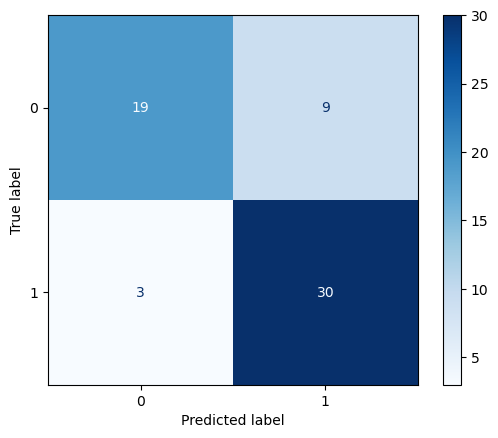

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

